In [51]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns

import pickle

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
def read_and_concat_csv(filepath, quantity):
    temp_df_A = pd.DataFrame()
    for x in range(quantity):
        temp_df_B = pd.read_csv(f'{filepath}{x+1}.csv')
        temp_df_A = pd.concat([temp_df_A, temp_df_B])
    return temp_df_A

In [18]:
daily_2018 = pd.read_csv('../data/batters_2018_daily_master.csv')

In [5]:
drop_cols = ['Tm', 'SB', 'CS']

In [6]:
daily_2018.drop(columns=drop_cols, inplace=True)

In [7]:
def remove_under25(df):
    under_25pct = []
    for player in df.playerId.unique():
        if df[df['playerId'] == player].Date.count() < 41:
            under_25pct.append(player)
    for player in under_25pct:
        df = df[df['playerId'] != player]
    return df

In [8]:
remove_under25(daily_2018)

,Date,Name,G,PA,AB,H,1B,2B,3B,HR,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2018-03-29,Ozzie Albies,1,5,5,1,0,0,0,1,...,0.000000,0.333333,0.000000,0.0,0.2500,0.5000,0.2500,0.0000,0.7500,0.2500
1,2018-03-29,Maikel Franco,1,4,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.5000,0.0000,0.5000,0.0000,1.0000,0.0000
2,2018-03-29,Evan Gattis,1,4,3,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
3,2018-03-29,Yoan Moncada,1,6,6,1,0,1,0,0,...,0.000000,0.000000,0.000000,0.0,0.5000,0.5000,0.0000,0.0000,0.0000,1.0000
5,2018-03-29,Eddie Rosario,1,5,4,1,1,0,0,0,...,0.000000,0.000000,0.500000,0.0,0.7500,0.0000,0.2500,0.0000,0.5000,0.5000
6,2018-03-29,Avisail Garcia,1,6,6,2,1,1,0,0,...,0.000000,0.000000,0.000000,0.0,0.5000,0.3333,0.1667,0.0000,0.5000,0.5000
7,2018-03-29,Nick Williams,1,4,4,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0000,0.0000,1.0000,0.5000,0.5000,0.0000
8,2018-03-29,Delino DeShields,1,4,4,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0000,0.6667,0.3333,0.0000,0.6667,0.3333
10,2018-03-29,Ender Inciarte,1,5,4,1,0,1,0,0,...,0.000000,0.000000,0.000000,0.0,0.5000,0.5000,0.0000,0.5000,0.2500,0.2500
12,2018-03-29,Alcides Escobar,1,4,3,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.6667,0.3333,0.0000,0.0000,0.6667,0.3333


In [19]:
daily_2017 = pd.read_csv('../data/batters_2017_daily_master.csv')
daily_2016 = pd.read_csv('../data/batters_2016_daily_master.csv')

# daily_2017.drop(columns=drop_cols, inplace=True)
# daily_2016.drop(columns=drop_cols, inplace=True)

In [20]:
all_seasons = pd.concat([daily_2016, daily_2017])
all_seasons = pd.concat([all_seasons, daily_2018])

In [21]:
all_seasons.drop(columns=drop_cols, inplace=True)

In [22]:
all_seasons = remove_under25(all_seasons)

In [13]:
def add_rolling_avg(df):
    custom_df = pd.DataFrame()
    
    for player in df.playerId.unique():
        player_df = df[df['playerId'] == player]
        player_df['Date'] = pd.to_datetime(player_df['Date'])
        player_df.set_index('Date', inplace=True)
        
        player_df['prev3_avg'] = player_df.H.rolling(3).sum() / player_df.PA.rolling(3).sum()
        player_df['prev5_avg'] = player_df.H.rolling(5).sum() / player_df.PA.rolling(5).sum()
        player_df['next_game_hit'] = (player_df.H.shift(-1) != 0)
        
        custom_df = custom_df.append(player_df)
        
    return custom_df.sort_index()

In [23]:
all_seasons = add_rolling_avg(all_seasons)

/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [24]:
all_seasons.dropna(inplace=True)

In [25]:
X = all_seasons.drop(columns=['Name', 'playerId', 'next_game_hit'])
y = all_seasons['next_game_hit']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [29]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train_sc, y_train)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
logreg.score(X_train_sc, y_train)

0.5985246758966172

In [33]:
logreg.score(X_test_sc, y_test)

0.5938454763149927

In [34]:
def score_model(actuals, predictions):
    tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    print(f'T Pos: {tp},   F Pos: {fp}')
    print(f'F Neg: {fn},   T Neg: {tn}')
    print(f'Accuracy: {(tp+tn)/len(predictions)}')
    print(f'Precision: {tp/(tp+fp)}')

In [35]:
logreg_preds = logreg.predict(X_test_sc)

In [36]:
score_model(y_test, logreg_preds)

T Pos: 18007,   F Pos: 11918
F Neg: 2838,   T Neg: 3568
Accuracy: 0.5938454763149927
Precision: 0.6017376775271512


In [37]:
y_test.mean()

0.5737524428174287

In [38]:
all_true = [True for x in range(len(y_test))]

In [39]:
score_model(y_test, all_true)

T Pos: 20845,   F Pos: 15486
F Neg: 0,   T Neg: 0
Accuracy: 0.5737524428174287
Precision: 0.5737524428174287


In [40]:
logreg_pred_proba = [i[1] for i in logreg.predict_proba(X_test_sc)]

logreg_pred_df = pd.DataFrame({'true_values': y_test,
                           'pred_probs':logreg_pred_proba})

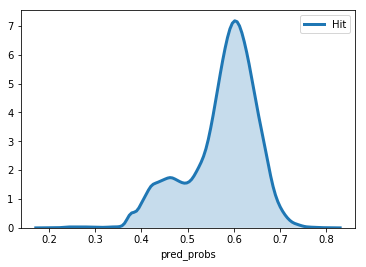

In [41]:
sns.distplot(logreg_pred_df['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')

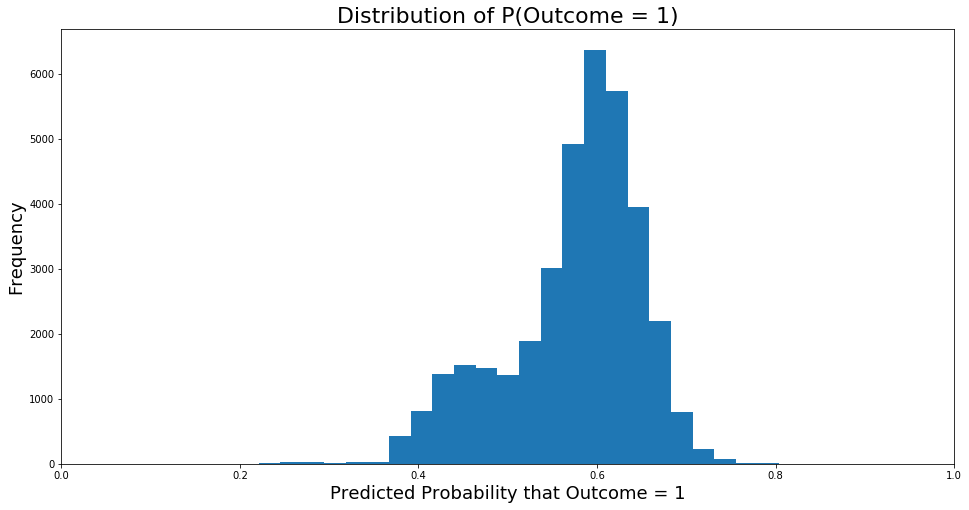

In [42]:
plt.figure(figsize = (16,8))

plt.hist(logreg_pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

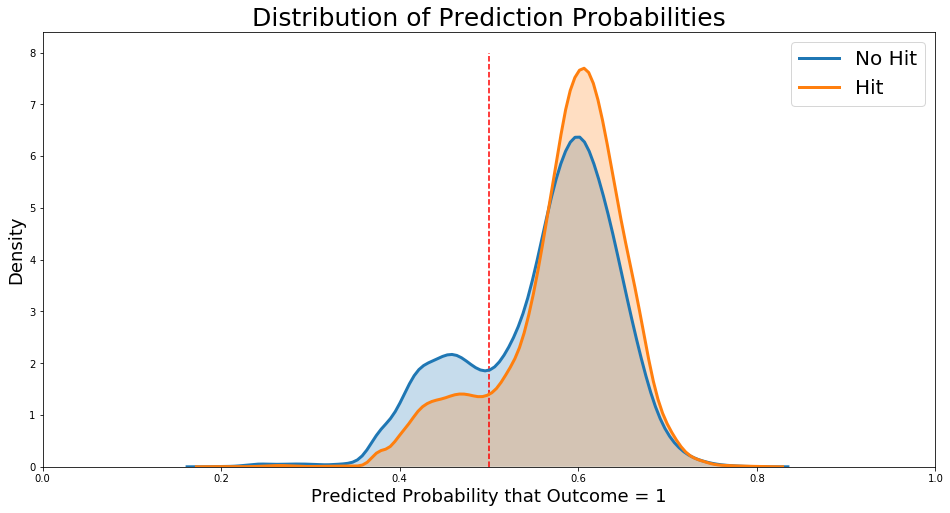

In [45]:
plt.figure(figsize = (16,8))

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 8,
           color='r',
           linestyle = '--')

sns.distplot(logreg_pred_df[logreg_pred_df['true_values'] == 0]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='No Hit')
sns.distplot(logreg_pred_df[logreg_pred_df['true_values'] == 1]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')



plt.title('Distribution of Prediction Probabilities', fontsize=25)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

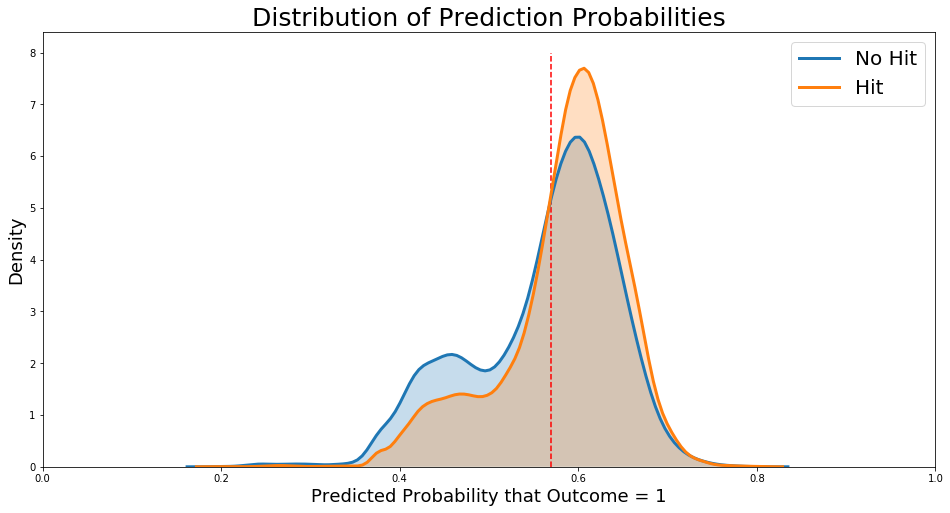

In [46]:
plt.figure(figsize = (16,8))

plt.vlines(x=0.57,
           ymin = 0,
           ymax = 8,
           color='r',
           linestyle = '--')

sns.distplot(logreg_pred_df[logreg_pred_df['true_values'] == 0]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='No Hit')
sns.distplot(logreg_pred_df[logreg_pred_df['true_values'] == 1]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')



plt.title('Distribution of Prediction Probabilities', fontsize=25)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

In [47]:
logreg_preds57 = (logreg.predict_proba(X_test_sc)[:,1] >= 0.57).astype(bool)

In [48]:
score_model(y_test, logreg_preds57)

T Pos: 14085,   F Pos: 8665
F Neg: 6760,   T Neg: 6821
Accuracy: 0.5754314497261293
Precision: 0.6191208791208791


In [49]:
rf = RandomForestClassifier(random_state=6)
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 6, 7],
    'max_features': [4, 5, 6],
    'min_samples_split': [2, 5, 9]
}

In [50]:
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 6, 7], 'max_features': [4, 5, 6], 'min_samples_split': [2, 5, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
# with open('../models/gridsearch.pkl', 'wb') as f:
#     pickle.dump(gs, f)

In [54]:
gs.score(X_train_sc, y_train)

0.6021762865505124

In [55]:
gs.score(X_test_sc, y_test)

0.594808840934739

In [56]:
gs_pred_proba = [i[1] for i in gs.predict_proba(X_test_sc)]

gs_pred_df = pd.DataFrame({'true_values': y_test,
                           'pred_probs':gs_pred_proba})

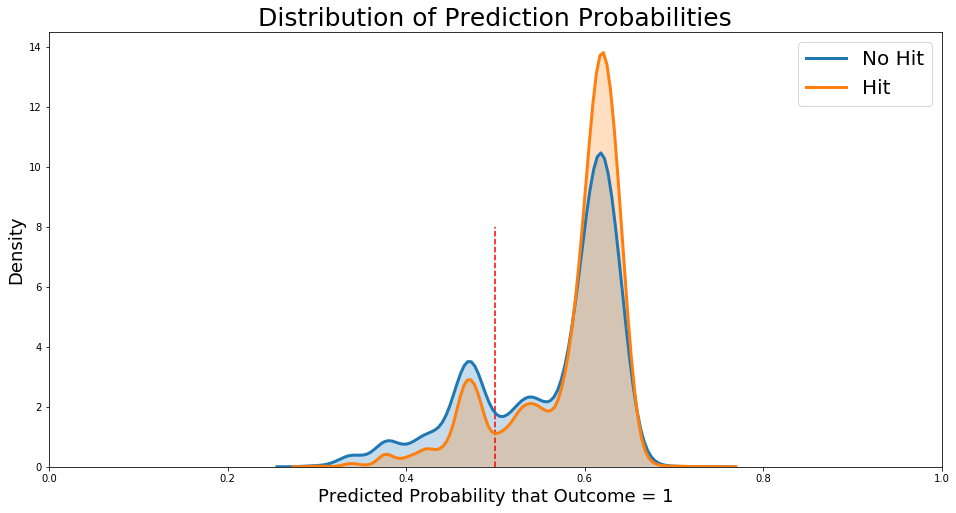

In [58]:
plt.figure(figsize = (16,8))

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 8,
           color='r',
           linestyle = '--')

sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 0]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='No Hit')
sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 1]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')



plt.title('Distribution of Prediction Probabilities', fontsize=25)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

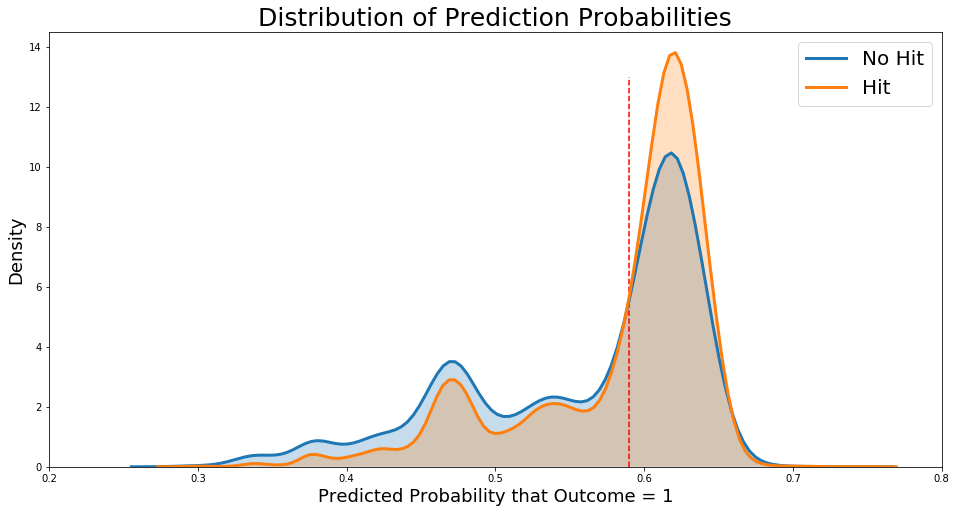

In [107]:
plt.figure(figsize = (16,8))

plt.vlines(x=0.59,
           ymin = 0,
           ymax = 13,
           color='r',
           linestyle = '--')

sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 0]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='No Hit')
sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 1]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')



plt.title('Distribution of Prediction Probabilities', fontsize=25)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0.2,0.8)

plt.legend(fontsize=20);

In [110]:
gs_preds59 = (gs.predict_proba(X_test_sc)[:,1] >= 0.6).astype(bool)

In [111]:
score_model(y_test, gs_preds59)

T Pos: 12357,   F Pos: 7476
F Neg: 8488,   T Neg: 8010
Accuracy: 0.5605956345820374
Precision: 0.6230524882771139


In [112]:
len(y_test)

36331

In [105]:
y_test.mean()

0.5737524428174287

In [113]:
X_test.head()

,G,PA,AB,H,1B,2B,3B,HR,R,RBI,...,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-17,1,5,4,1,0,1,0,0,1,1,...,0.0,0.0,0.25,0.5000,0.2500,0.0,1.0,0.0,0.266667,0.250000
2018-05-17,1,6,6,2,2,0,0,0,1,1,...,0.0,0.0,0.00,0.6667,0.3333,0.0,1.0,0.0,0.416667,0.238095
2018-05-17,1,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.5000,0.5000,0.5,0.5,0.0,0.200000,0.222222
2018-05-17,1,5,5,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0000,1.0000,0.5,0.0,0.5,0.153846,0.136364
2018-05-17,1,2,2,1,1,0,0,0,0,0,...,0.0,0.0,0.00,1.0000,0.0000,0.5,0.5,0.0,0.285714,0.166667


In [115]:
X_test.G.value_counts()

1    36331
Name: G, dtype: int64